<a href="https://colab.research.google.com/github/EdoHanifauzan/data/blob/Notebook/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTS

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [174]:
url_dataset = "https://raw.githubusercontent.com/EdoHanifauzan/data/main/dataR2.csv"
duts = pd.read_csv(url_dataset)

In [175]:
#check number of rows and columns in dataset
duts.shape

(116, 10)

In [176]:
duts.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.064

In [177]:
X = duts.iloc[:,:-1].values
y = duts.iloc[:, 9].values

Pada tahap ini data yang jumlahnya 1516ajan dibagi menjadi data latih dan data uji dengan menggunakan **train_test_split ** agar data yang dibagi seimbang

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [179]:
print(X_train)

[[6.90000000e+01 3.25000000e+01 9.30000000e+01 5.43000000e+00
  1.24564200e+00 1.51450000e+01 1.17879600e+01 1.17879600e+01
  2.70142000e+02]
 [7.10000000e+01 2.79155188e+01 1.04000000e+02 1.82000000e+01
  4.66890667e+00 5.34997000e+01 1.65602000e+00 4.92418400e+01
  2.56001000e+02]
 [5.90000000e+01 2.86726261e+01 7.70000000e+01 3.18800000e+00
  6.05507467e-01 1.70220000e+01 1.64404800e+01 3.16904000e+01
  9.10489000e+02]
 [5.10000000e+01 1.83700000e+01 1.05000000e+02 6.03000000e+00
  1.56177000e+00 9.62000000e+00 1.27600000e+01 3.21000000e+00
  5.13660000e+02]
 [5.30000000e+01 3.67901662e+01 1.01000000e+02 1.01750000e+01
  2.53493167e+00 2.71841000e+01 2.00300000e+01 1.02630900e+01
  6.95754000e+02]
 [5.90000000e+01 2.28328793e+01 9.80000000e+01 6.86200000e+00
  1.65877413e+00 1.49037000e+01 4.23010500e+00 8.20490000e+00
  3.55310000e+02]
 [4.30000000e+01 3.44221736e+01 8.90000000e+01 2.31940000e+01
  5.09185613e+00 3.12128000e+01 8.30095500e+00 6.71026000e+00
  9.60246000e+02]
 [6.50

In [180]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [181]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

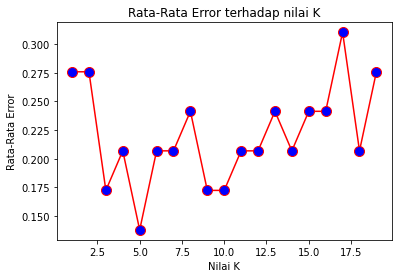

In [182]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 20), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [183]:
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.88      0.88      0.88        16

    accuracy                           0.86        29
   macro avg       0.86      0.86      0.86        29
weighted avg       0.86      0.86      0.86        29



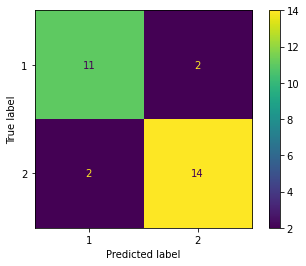

In [187]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

#Decision tree

In [189]:
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.20)

In [194]:
# x sebagai variable independent
x = duts.drop(['Classification'], axis = 1)
x.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

In [196]:
# y sebagai variable dependent
y = duts['Classification']
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64>

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [198]:
print(x_train)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
43    69  32.500000       93    5.430  1.245642  15.1450    11.787960   
98    71  27.915519      104   18.200  4.668907  53.4997     1.656020   
80    59  28.672626       77    3.188  0.605507  17.0220    16.440480   
72    51  18.370000      105    6.030  1.561770   9.6200    12.760000   
31    53  36.790166      101   10.175  2.534932  27.1841    20.030000   
..   ...        ...      ...      ...       ...      ...          ...   
76    55  31.975015       92   16.635  3.775036  37.2234    11.018455   
10    34  21.470000       78    3.469  0.667436  14.5700    13.110000   
28    35  35.250761       90    6.817  1.513374  50.6094     6.966895   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
49    85  26.600000       96    4.462  1.056602   7.8500     7.931700   

     Resistin    MCP.1  
43   11.78796  270.142  
98   49.24184  256.001  
80   31.69040  910.489  
72    3.21000  513.660 

In [199]:
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train,y_train)

In [200]:

y_pred = clf.predict(x_test)

Akurasi

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        13
           2       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29



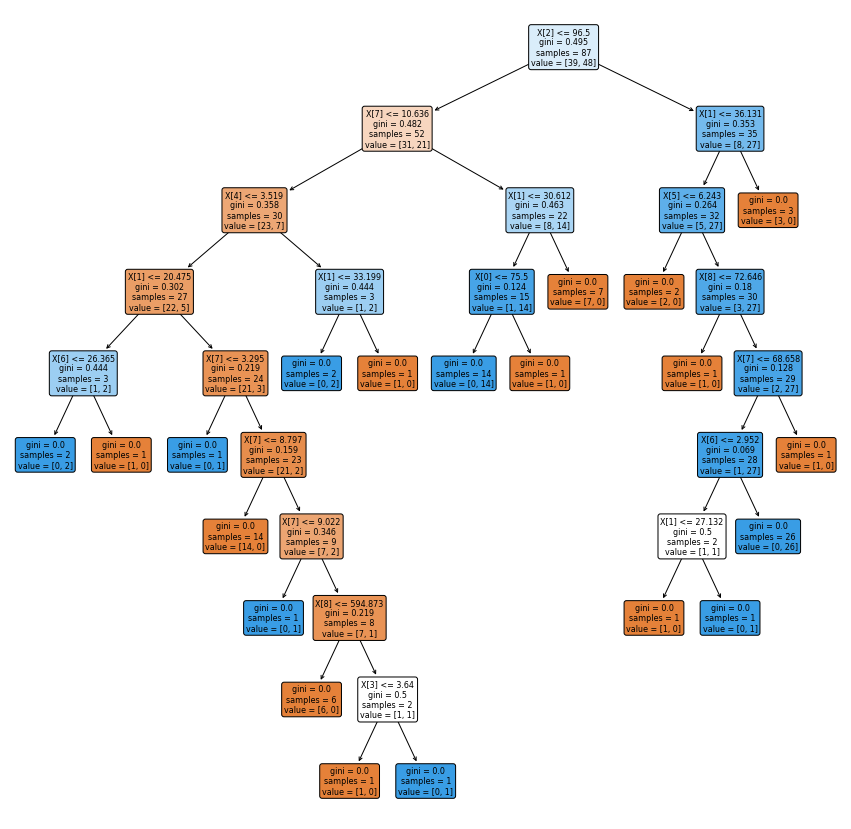

In [202]:
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()